In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn import datasets

In [3]:
# load the data
iris = datasets.load_iris()

In [4]:
# get the data (X) and target (y)
X, y = iris.data, iris.target
print(f"{X.shape=}")
print(f"{y.shape=}")

X.shape=(150, 4)
y.shape=(150,)


# Data Visualisation and feature selection  
## Pairplot

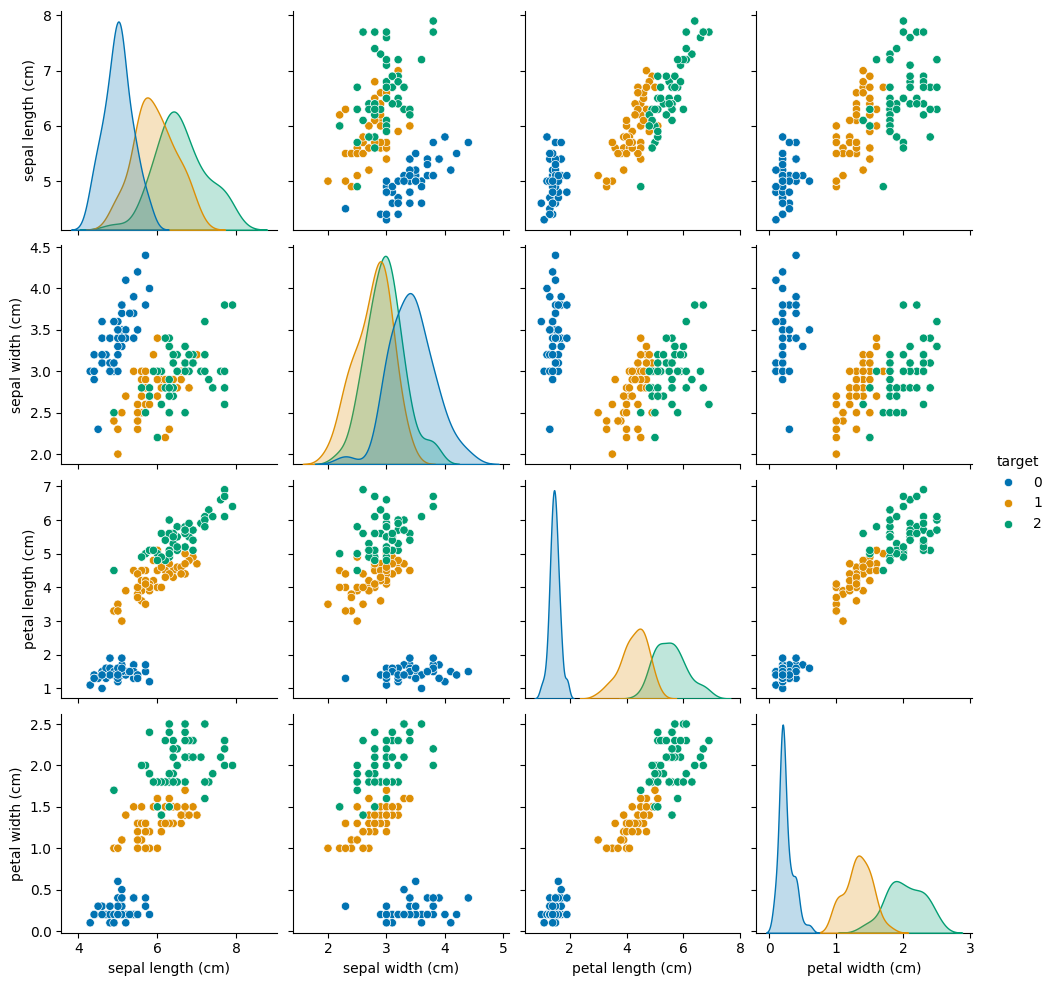

In [9]:
import seaborn as sns

data, target = datasets.load_iris(return_X_y = True, as_frame = True)
features_labels = pd.concat([data, target], axis=1)
sns.pairplot(features_labels, hue = "target", palette = "colorblind");

## correlation heatmap

In [10]:
features_labels.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


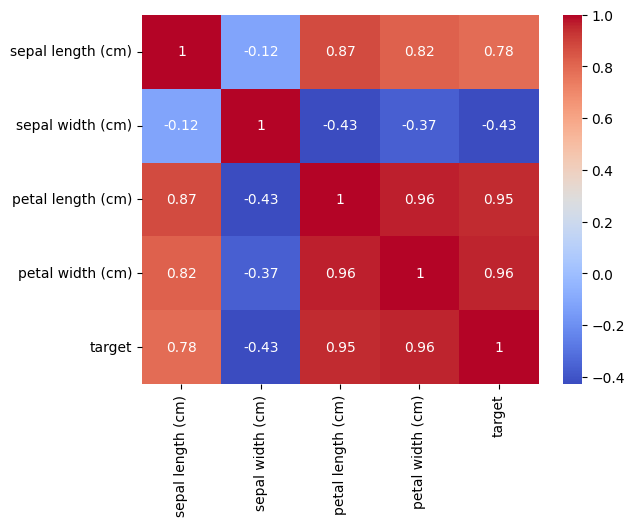

In [11]:
sns.heatmap(features_labels.corr(), annot = True, cmap = "coolwarm");

## FEATURE SELECTION
We note that petal length and petal width have high correlation, so we may consider removing them, if we want.  
On the other hand, petal width is highly correlated with the target (similarly petal length is highly correlated with the target). This suggests that we may want to keep petal width (or petal length), as it is a good predictor of the target.

# ML experiment with sklearn

In [13]:
# load the data
iris = datasets.load_iris()

# get the data (X) and target (y)
X, y = iris.data, iris.target

# split dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42,
                                                    stratify=y)

# Modelling

In [20]:
# get the LogisticRegression estimator
from sklearn.linear_model import LogisticRegression

# training the model
# apply algorithm to data using fit()
clf = LogisticRegression(solver= "newton-cg", multi_class = "multinomial")
clf.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='multinomial', solver='newton-cg')

## Model persistence
It is possibe to save a model in skikit by using Python built in persistence model

In [23]:
import pickle
pickle.dump(clf, open("iris_trained_model.p", "wb"))
clf2 = pickle.load(open("iris_trained_model.p", "rb"))

# Scoring/Predicting

In [24]:
# Score the model (step 5)
y_hat = clf.predict(X_test)

# Evaluation

In [25]:
# Evaluation of the model (step 6)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_hat)
print(cm)

[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]
